# Purpose
predict client's sex through transactions

In [1]:
import pandas as pd
import numpy as np

import time as tm
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = 'C:/Users/nowic/Desktop/home_tasks/pets/sex_classifier/raw_data/'

In [3]:
transactions = pd.read_csv(f'{filepath}final.csv')
transactions

,client_id,datetime,code,type,amount,target,type_description,code_description
0,16004843,245 22:10:18,5411,1010,-7928.08,0,Покупка. POS,"Бакалейные магазины, супермаркеты"
1,20873616,433 07:44:21,4814,1030,-56.15,0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."
2,65231233,164 15:58:23,5411,1010,-4689.47,1,Покупка. POS,"Бакалейные магазины, супермаркеты"
3,29536165,413 11:47:51,5411,1010,-3703.52,1,Покупка. POS,"Бакалейные магазины, супермаркеты"
4,66473821,280 05:17:26,6010,7030,67377.47,1,Перевод на карту (с карты) через АТМ (в предел...,Финансовые институты — снятие наличности вручную
...,...,...,...,...,...,...,...,...
5195,66245004,14 13:42:20,6011,2010,-22459.16,1,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
5196,46562431,441 19:23:14,6010,7070,44918.32,1,Перевод на карту (с карты) через Мобильный бан...,Финансовые институты — снятие наличности вручную
5197,64504493,224 12:36:21,6011,2010,-128017.20,1,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
5198,47578863,264 17:24:29,5411,1010,-9334.03,1,Покупка. POS,"Бакалейные магазины, супермаркеты"


In [4]:
transactions.isnull().sum()

client_id           0
datetime            0
code                0
type                0
amount              0
target              0
type_description    1
code_description    0
dtype: int64

In [5]:
# смотрим пропущенное значение
transactions[transactions['type_description'].isnull()]

,client_id,datetime,code,type,amount,target,type_description,code_description
3068,44676756,335 10:39:55,6012,2456,-202132.42,0,NaN,Финансовые институты — торговля и услуги


In [6]:
# проверяем клиента
transactions.query('client_id == 44676756')

,client_id,datetime,code,type,amount,target,type_description,code_description
562,44676756,409 10:36:33,4814,1030,-4491.83,1,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."
1061,44676756,436 09:48:34,4112,1100,-29423.74,0,Покупка.,Пассажирские железные перевозки
3068,44676756,335 10:39:55,6012,2456,-202132.42,0,NaN,Финансовые институты — торговля и услуги


In [7]:
# проверяем записи по описанию кода, чтобы выяснить его основной тип
transactions.query('code_description == "Финансовые институты — торговля и услуги"')

,client_id,datetime,code,type,amount,target,type_description,code_description
9,34147053,189 00:00:00,6012,6110,222345.66,0,Возврат покупки. POS,Финансовые институты — торговля и услуги
156,70665012,381 00:00:00,6012,6110,53901.98,0,Возврат покупки. POS,Финансовые институты — торговля и услуги
794,93533984,280 00:00:00,6012,6110,152722.27,0,Возврат покупки. POS,Финансовые институты — торговля и услуги
2041,24062324,156 00:00:00,6012,6110,224591.58,0,Возврат покупки. POS,Финансовые институты — торговля и услуги
2412,58006798,355 00:00:00,6012,6110,1010662.10,1,Возврат покупки. POS,Финансовые институты — торговля и услуги
3068,44676756,335 10:39:55,6012,2456,-202132.42,0,NaN,Финансовые институты — торговля и услуги
4167,8014460,189 00:00:00,6012,6110,1083.88,0,Возврат покупки. POS,Финансовые институты — торговля и услуги
4433,75199858,228 00:00:00,6012,6110,15721.41,1,Возврат покупки. POS,Финансовые институты — торговля и услуги
4493,59986494,429 00:00:00,6012,6110,22459.16,0,Возврат покупки. POS,Финансовые институты — торговля и услуги
4594,61009235,302 00:00:00,6012,6110,40426.48,1,Возврат покупки. POS,Финансовые институты — торговля и услуги


In [8]:
# смотрим записи с отсутствующим типом
transactions.query('type_description == "н/д" or type_description == "н/д(нет данных)"')

,client_id,datetime,code,type,amount,target,type_description,code_description
744,67923421,63 20:47:37,4829,2440,-11229.58,0,н/д,Денежные переводы
1304,53882112,444 22:26:47,5411,1310,-17630.44,1,н/д,"Бакалейные магазины, супермаркеты"
3351,92322336,108 13:46:25,4829,2440,-202132.42,0,н/д,Денежные переводы
3856,77391649,399 11:48:33,4829,2440,-134754.95,1,н/д,Денежные переводы
4121,22364003,405 16:27:18,4829,4090,-842.22,0,н/д,Денежные переводы
4661,53882112,304 11:14:11,5411,1310,-26187.38,0,н/д,"Бакалейные магазины, супермаркеты"
4680,99568688,295 13:56:34,5411,1310,-23716.87,0,н/д,"Бакалейные магазины, супермаркеты"
4910,29607953,415 18:22:42,4829,4090,-673.77,0,н/д,Денежные переводы


In [9]:
transactions.drop(index=[3068, 744, 1304, 3351, 3856,
                   4121, 4661, 4680, 4910], inplace=True)

In [10]:
transactions.reset_index(drop=True, inplace=True)
transactions

,client_id,datetime,code,type,amount,target,type_description,code_description
0,16004843,245 22:10:18,5411,1010,-7928.08,0,Покупка. POS,"Бакалейные магазины, супермаркеты"
1,20873616,433 07:44:21,4814,1030,-56.15,0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."
2,65231233,164 15:58:23,5411,1010,-4689.47,1,Покупка. POS,"Бакалейные магазины, супермаркеты"
3,29536165,413 11:47:51,5411,1010,-3703.52,1,Покупка. POS,"Бакалейные магазины, супермаркеты"
4,66473821,280 05:17:26,6010,7030,67377.47,1,Перевод на карту (с карты) через АТМ (в предел...,Финансовые институты — снятие наличности вручную
...,...,...,...,...,...,...,...,...
5186,66245004,14 13:42:20,6011,2010,-22459.16,1,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
5187,46562431,441 19:23:14,6010,7070,44918.32,1,Перевод на карту (с карты) через Мобильный бан...,Финансовые институты — снятие наличности вручную
5188,64504493,224 12:36:21,6011,2010,-128017.20,1,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
5189,47578863,264 17:24:29,5411,1010,-9334.03,1,Покупка. POS,"Бакалейные магазины, супермаркеты"


In [11]:
transactions.groupby('code_description').agg({'code': 'count'})

,code
code_description,
"Авиалинии, авиакомпании",1
"Авиалинии, авиакомпании, нигде более не классифицированные",2
Автозапчасти и аксессуары,10
Автомойки,2
Автошины,1
...,...
Финансовые институты — снятие наличности вручную,735
Финансовые институты — торговля и услуги,10
Флористика,4


In [12]:
transactions.groupby('type_description').agg({'type': 'count'})

,type
type_description,
Безналичный перевод денежных средств через POS,3
Взнос наличных через POS,26
Взнос наличных через АТМ,12
Взнос наличных через АТМ (в других ТБ) по счету в овердрафте,1
Взнос наличных через АТМ (в своем ТБ) по счету в овердрафте,1
Взнос наличных через АТМ (в своем тер.банке),189
Возврат покупки. POS,1
Возврат покупки. Зарубеж.,5
Возврат покупки. POS,16


In [13]:
transactions.groupby(['code_description', 'type_description']).agg({'type': 'count'})

type
code_description                                   type_description           
Авиалинии, авиакомпании                            Покупка. POS              1
Авиалинии, авиакомпании, нигде более не классиф... Покупка.                  2
Автозапчасти и аксессуары                          Покупка.                  1
                                                   Покупка. POS              9
Автомойки                                          Покупка. POS              2
...                                                                        ...
Финансовые институты — торговля и услуги           Возврат покупки. POS     10
Флористика                                         Покупка.                  1
                                                   Покупка. POS              3
Фотостудии                                         Покупка. POS              1
Центры здоровья                                    Покупка. POS              1

[174 rows x 1 columns]

In [14]:
# type_description выглядит более привлекательной для обобщения, чем code_description
# подводим категорию типов под более общую, чтобы сделать её более полезной для будущей модели

index = 0
for type in transactions['type_description']:
    if 'Взнос' in type and 'наличных' in type:
        transactions.at[index, 'type_description'] = 'Взнос наличных'
        index += 1
        continue

    if 'Возврат' in type and 'покупки' in type:
        transactions.at[index, 'type_description'] = 'Возврат покупки'
        index += 1
        continue

    if ('Выдача' in type and 'наличных' in type) or 'Наличные.' in type:
        transactions.at[index, 'type_description'] = 'Выдача наличных'
        index += 1
        continue

    if 'Плата за' in type:
        transactions.at[index, 'type_description'] = 'Комиссионные отчисления'
        index += 1
        continue

    if 'Безналичный перевод' in type or 'Перевод' in type or 'Списание с карты' in type:
        transactions.at[index, 'type_description'] = 'Переводы'
        index += 1
        continue

    if 'Покупка.' in type:
        transactions.at[index, 'type_description'] = 'Покупка'
        index += 1
        continue

    else:
        index += 1
        continue

# проверяем, всё ли работает, заодно смотрим востребованность категорий
transactions.groupby('type_description').agg({'type': 'count'})\
    .sort_values('type', ascending=False)

,type
type_description,
Покупка,2133
Переводы,1092
Выдача наличных,890
Оплата услуги. Банкоматы,713
Взнос наличных,229
Комиссионные отчисления,112
Возврат покупки,22


<AxesSubplot:xlabel='target', ylabel='amount'>

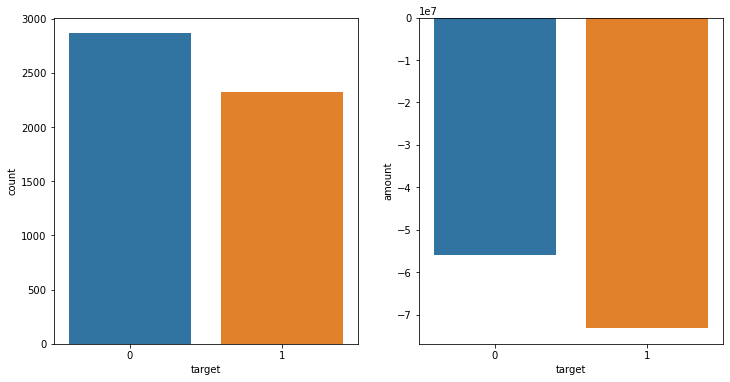

In [15]:
# смотрим, кто из двух полов чаще делает покупки и тратит денег
count_amount = transactions.groupby('target', as_index=False)\
    .agg({'code': 'count', 'amount': 'sum'}).rename(columns={'code': 'count'})

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.barplot(x='target', y='count', data=count_amount, ax=axes[0])
sns.barplot(x='target', y='amount', data=count_amount, ax=axes[1])

In [16]:
# пол 0 ведёт больше транзакций, но тратит меньше

[Text(0, 0, ''),
 Text(0, 1, ''),
 Text(0, 2, ''),
 Text(0, 3, ''),
 Text(0, 4, ''),
 Text(0, 5, ''),
 Text(0, 6, '')]

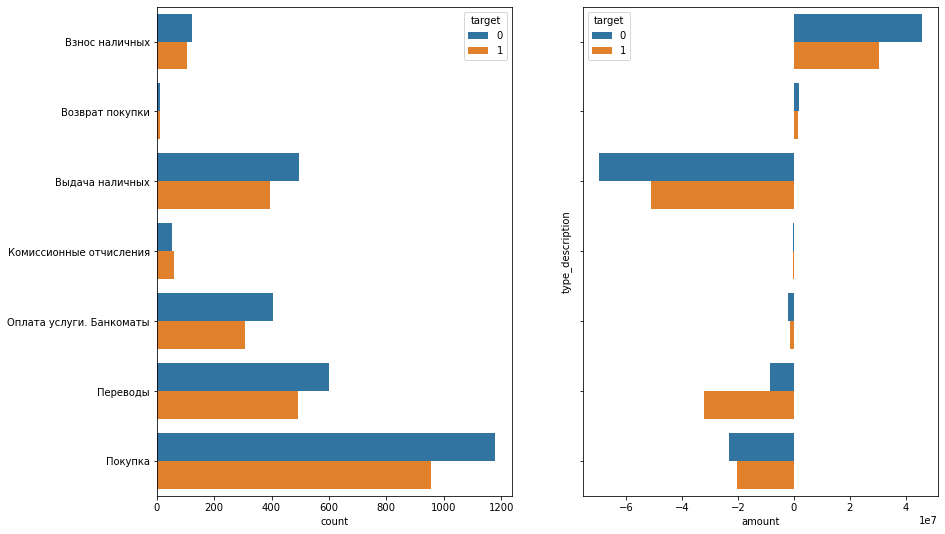

In [17]:
# смотрим кол-во денег и покупок для пола по категориям
type_target = transactions.groupby(['type_description', 'target'], as_index=False)\
    .agg({'type': 'count', 'amount': 'sum'}).rename(columns={'type': 'count'})

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))
b1 = sns.barplot(y='type_description', x='count', hue='target',
                 orient='h', data=type_target, ax=axes[0])
b1.set_ylabel('')

b2 = sns.barplot(y='type_description', x='amount', hue='target',
                 orient='h', data=type_target, ax=axes[1])
b2.set_yticklabels([])

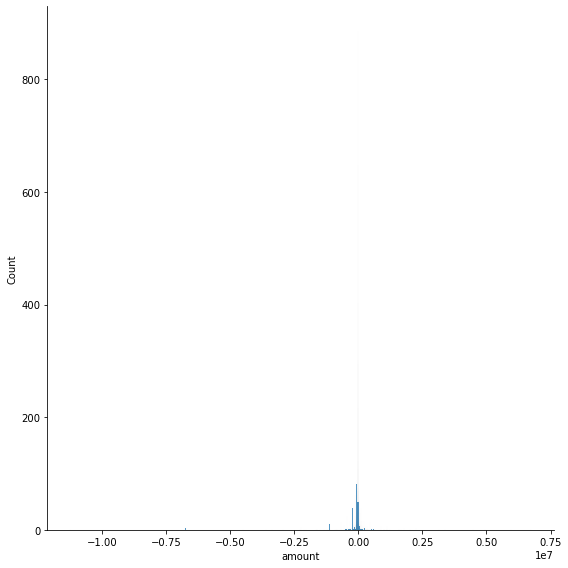

In [18]:
# распределение amount
sns.displot(data=transactions, x='amount', height=8)

Text(0.5, 1.0, 'Покупка')

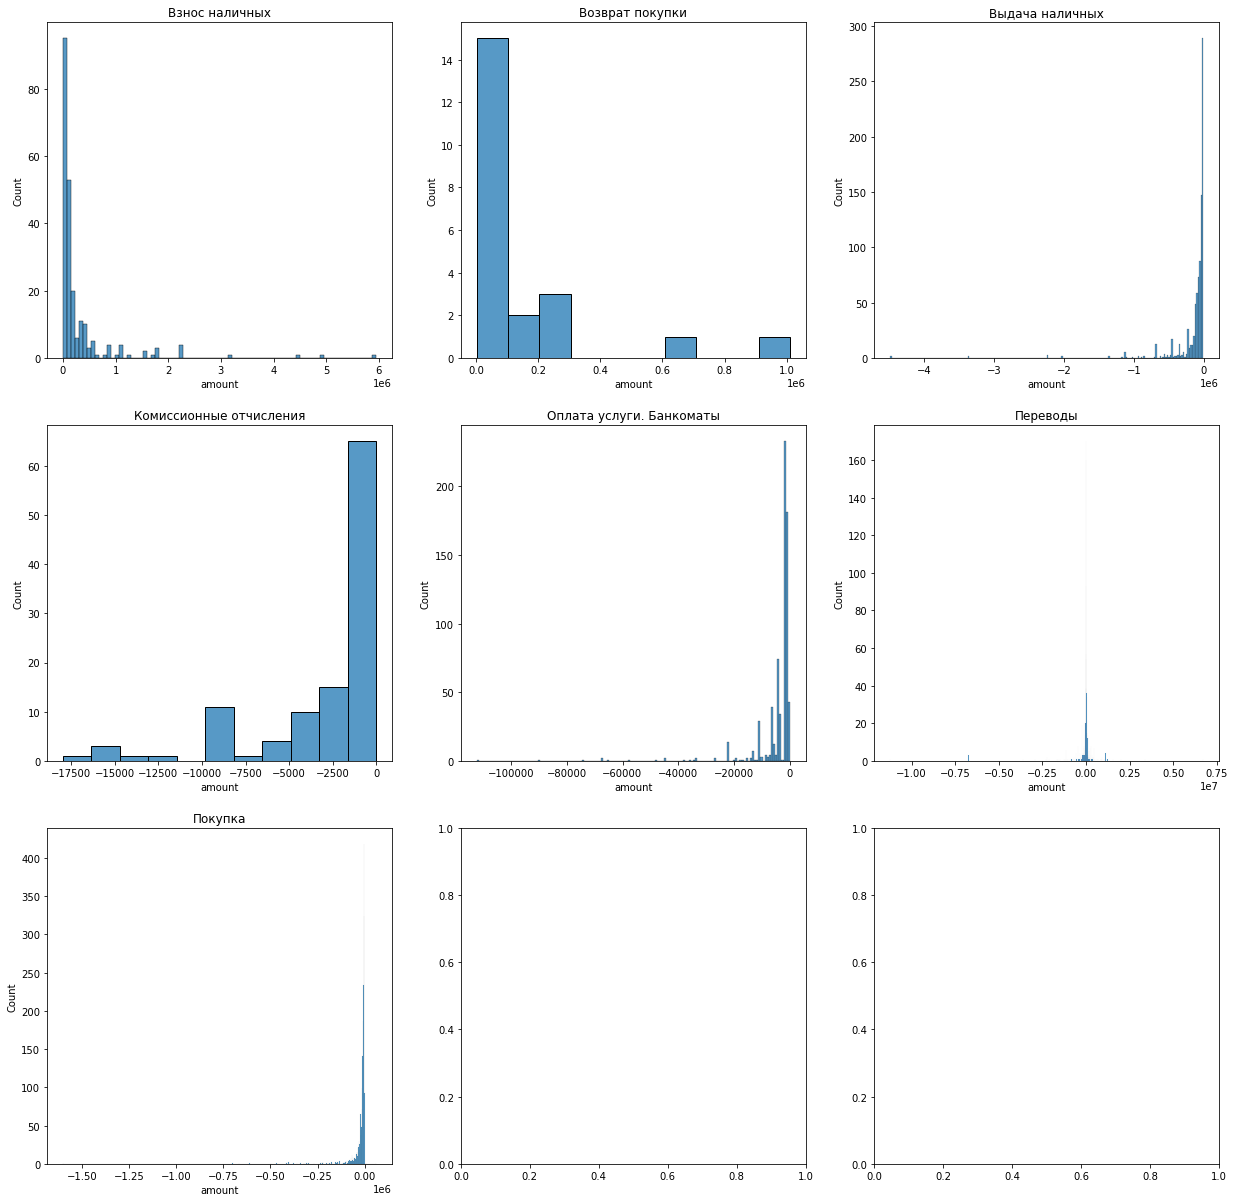

In [19]:
# распределение amount для каждой категории типов
_, axes = plt.subplots(nrows=3, ncols=3, figsize=(21, 21))
h1 = sns.histplot(data=transactions.query('type_description == "Взнос наличных"'),
             x='amount', ax=axes[0, 0])
h1.set_title('Взнос наличных')

h2 = sns.histplot(data=transactions.query('type_description == "Возврат покупки"'),
             x='amount', ax=axes[0, 1])
h2.set_title('Возврат покупки')

h3 = sns.histplot(data=transactions.query('type_description == "Выдача наличных"'),
             x='amount', ax=axes[0, 2])
h3.set_title('Выдача наличных')

h4 = sns.histplot(data=transactions.query('type_description == "Комиссионные отчисления"'),
             x='amount', ax=axes[1, 0])
h4.set_title('Комиссионные отчисления')

h5 = sns.histplot(data=transactions.query('type_description == "Оплата услуги. Банкоматы"'),
             x='amount', ax=axes[1, 1])
h5.set_title('Оплата услуги. Банкоматы')

h6 = sns.histplot(data=transactions.query('type_description == "Переводы"'),
             x='amount', ax=axes[1, 2])
h6.set_title('Переводы')

h7 = sns.histplot(data=transactions.query('type_description == "Покупка"'),
             x='amount', ax=axes[2, 0])
h7.set_title('Покупка')

In [20]:
# разобьём колонку datetime по дню и времени
transactions['day'] = None
transactions['time'] = None
index = 0

for date in transactions['datetime']:
    day, time = date.split(sep=' ')

    transactions.at[index, 'day'] = day
    transactions.at[index, 'time'] = time
    index += 1

# проверям, ничего ли не потеряли по дороге
transactions.isnull().sum()

client_id           0
datetime            0
code                0
type                0
amount              0
target              0
type_description    0
code_description    0
day                 0
time                0
dtype: int64

In [21]:
# делаем колонку day численной для удобства
transactions['day'] = pd.to_numeric(transactions['day'])
transactions.sort_values('day')

,client_id,datetime,code,type,amount,target,type_description,code_description,day,time
871,14196903,0 13:23:44,6011,2010,-33688.74,0,Выдача наличных,Финансовые институты — снятие наличности автом...,0,13:23:44
2042,11701078,0 08:01:19,6010,7070,15759.14,0,Переводы,Финансовые институты — снятие наличности вручную,0,08:01:19
2078,22862903,0 16:01:36,5499,1010,-1572.14,1,Покупка,"Различные продовольственные магазины — рынки, ...",0,16:01:36
1213,9906759,0 16:03:43,5331,1010,-1816.95,1,Покупка,Универсальные магазины,0,16:03:43
2458,53355085,0 17:11:57,5641,1010,-23638.26,0,Покупка,"Детская одежда, включая одежду для самых мален...",0,17:11:57
...,...,...,...,...,...,...,...,...,...,...
1625,40532686,456 00:00:00,5411,1110,-1793.81,1,Покупка,"Бакалейные магазины, супермаркеты",456,00:00:00
3865,3467492,456 17:32:43,4829,4051,-224.59,1,Комиссионные отчисления,Денежные переводы,456,17:32:43
1246,58958646,456 11:44:39,5812,1110,-1055.58,1,Покупка,"Места общественного питания, рестораны",456,11:44:39
3094,76068532,456 13:05:22,5441,1010,-32509.63,1,Покупка,Кондитерские,456,13:05:22


In [22]:
# добавление колонок с месяцами и неделями
# (добавление года в данном случае смысла не имеет)
# ~ 30.333 дня в месяц (из расчёта в 364-х дней в году)
transactions['month'] = transactions['day']//30.333
transactions['month'] = transactions['month'].astype('int64')
transactions = transactions[['client_id', 'datetime',
                 'time', 'day', 'month',
                 'code', 'code_description',
                 'type', 'type_description',
                 'amount', 'target']]
transactions

,client_id,datetime,time,day,month,code,code_description,type,type_description,amount,target
0,16004843,245 22:10:18,22:10:18,245,8,5411,"Бакалейные магазины, супермаркеты",1010,Покупка,-7928.08,0
1,20873616,433 07:44:21,07:44:21,433,14,4814,"Звонки с использованием телефонов, считывающих...",1030,Оплата услуги. Банкоматы,-56.15,0
2,65231233,164 15:58:23,15:58:23,164,5,5411,"Бакалейные магазины, супермаркеты",1010,Покупка,-4689.47,1
3,29536165,413 11:47:51,11:47:51,413,13,5411,"Бакалейные магазины, супермаркеты",1010,Покупка,-3703.52,1
4,66473821,280 05:17:26,05:17:26,280,9,6010,Финансовые институты — снятие наличности вручную,7030,Переводы,67377.47,1
...,...,...,...,...,...,...,...,...,...,...,...
5186,66245004,14 13:42:20,13:42:20,14,0,6011,Финансовые институты — снятие наличности автом...,2010,Выдача наличных,-22459.16,1
5187,46562431,441 19:23:14,19:23:14,441,14,6010,Финансовые институты — снятие наличности вручную,7070,Переводы,44918.32,1
5188,64504493,224 12:36:21,12:36:21,224,7,6011,Финансовые институты — снятие наличности автом...,2010,Выдача наличных,-128017.20,1
5189,47578863,264 17:24:29,17:24:29,264,8,5411,"Бакалейные магазины, супермаркеты",1010,Покупка,-9334.03,1


<AxesSubplot:xlabel='month', ylabel='count'>

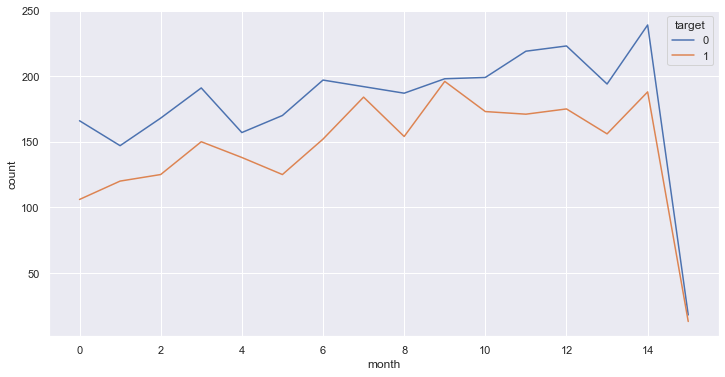

In [23]:
# кол-во транзакций в (условный) месяц + пол
month_count = transactions.groupby(['month', 'target'], as_index=False)\
    .agg({'code': 'count'}).rename(columns={'code': 'count'})

sns.set(rc={'figure.figsize': (12, 6)})
sns.lineplot(x='month', y='count', hue='target', data=month_count)

<AxesSubplot:xlabel='month', ylabel='mean'>

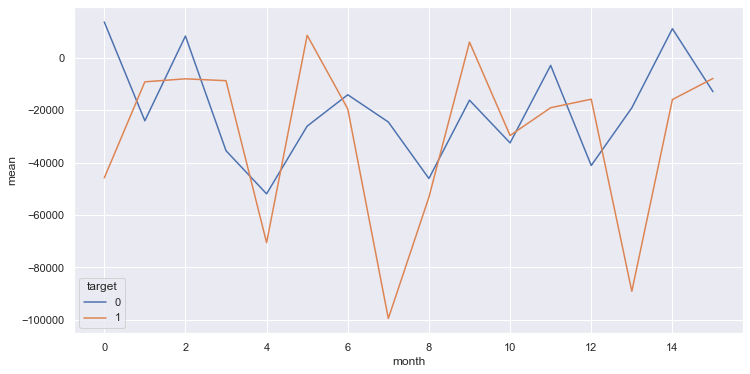

In [24]:
# посмотрим на среднее кол-во потраченных средств в месяц
month_mean = transactions.groupby(['month', 'target'], as_index=False)\
    .agg({'amount': 'mean'}).rename(columns={'amount': 'mean'})

sns.set(rc={'figure.figsize': (12, 6)})
sns.lineplot(x='month', y='mean', hue='target', data=month_mean)

<AxesSubplot:xlabel='month', ylabel='median'>

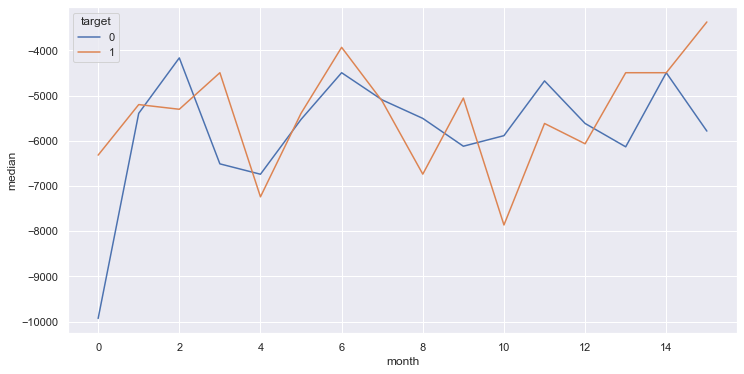

In [25]:
# посмотрим на медианы
month_median = transactions.groupby(['month', 'target'], as_index=False)\
    .agg({'amount': 'median'}).rename(columns={'amount': 'median'})

sns.set(rc={'figure.figsize': (12, 6)})
sns.lineplot(x='month', y='median', hue='target', data=month_median)

In [26]:
# предположительно в 4-й, 7-й и 13-й месяцы было сделано несколько дорогих покупок
# однако про 4-й месяц можно сказать, что все транзакции были дороже, чем обычно
# для обоих полов, в то время как на 7-й и 13-й месяц раскошеливался только пол 1

<AxesSubplot:xlabel='month', ylabel='count'>

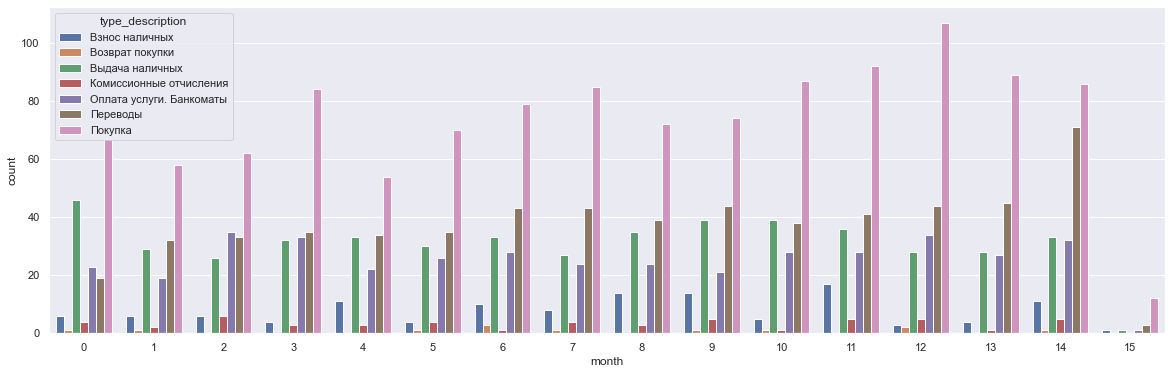

In [27]:
# посмотрим, на какие категории тратятся люди в месяц
month_type_0 = transactions.query('target == 0').groupby(['month', 'type_description'], as_index=False)\
    .agg({'amount': 'count'}).rename(columns={'amount': 'count'})

sns.set(rc={'figure.figsize': (20, 6)})
sns.barplot(x='month', y='count', hue='type_description', data=month_type_0)

<AxesSubplot:xlabel='month', ylabel='count'>

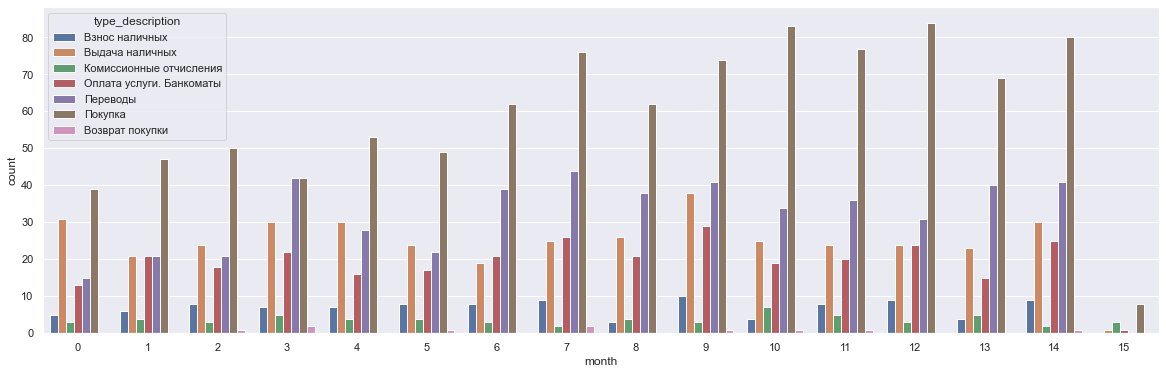

In [28]:
month_type_1 = transactions.query('target == 1').groupby(['month', 'type_description'], as_index=False)\
    .agg({'amount': 'count'}).rename(columns={'amount': 'count'})
sns.barplot(x='month', y='count', hue='type_description', data=month_type_1)

In [29]:
# Выводы:
# самые востребованные категории у обоих полов: покупка, переводы, выдача наличных
# пол 0 покупает больше, но тратит меньше, чем пол 1
# на 4-й, 7-й и 13-й месяцы возможно были крупные события
# в среднем каждый месяц имеет больше транзакций, чем предыдущий
# колонки code и code_description могут быть выкинуты, т.к. имеют слишком много категорий, содержащих мало записей
# client_id может содержать несколько транзакций и иметь при этом разный таргет, что не улучшит модель
# предположительно под полом 1 скрываются мужчины :)

In [34]:
trans = transactions.drop(['datetime', 'code_description', 'type'], axis=1)
trans

,client_id,time,day,month,code,type_description,amount,target
0,16004843,22:10:18,245,8,5411,Покупка,-7928.08,0
1,20873616,07:44:21,433,14,4814,Оплата услуги. Банкоматы,-56.15,0
2,65231233,15:58:23,164,5,5411,Покупка,-4689.47,1
3,29536165,11:47:51,413,13,5411,Покупка,-3703.52,1
4,66473821,05:17:26,280,9,6010,Переводы,67377.47,1
...,...,...,...,...,...,...,...,...
5186,66245004,13:42:20,14,0,6011,Выдача наличных,-22459.16,1
5187,46562431,19:23:14,441,14,6010,Переводы,44918.32,1
5188,64504493,12:36:21,224,7,6011,Выдача наличных,-128017.20,1
5189,47578863,17:24:29,264,8,5411,Покупка,-9334.03,1


In [35]:
# преобразуем время в секунды
index = 0
for timestamp in trans['time']:
    x = tm.strptime(timestamp, '%H:%M:%S')
    trans.at[index, 'time'] = datetime.timedelta(hours=x.tm_hour,
                                                        minutes=x.tm_min,
                                                        seconds=x.tm_sec).total_seconds()
    index += 1

trans.isnull().sum()

client_id           0
time                0
day                 0
month               0
code                0
type_description    0
amount              0
target              0
dtype: int64

In [36]:
trans['type_description'].replace({'Покупка': 0,
                                          'Переводы': 1,
                                          'Выдача наличных': 2,
                                          'Оплата услуги. Банкоматы': 3,
                                          'Взнос наличных': 4,
                                          'Комиссионные отчисления': 5,
                                          'Возврат покупки': 6}, inplace=True)
trans

,client_id,time,day,month,code,type_description,amount,target
0,16004843,79818.0,245,8,5411,0,-7928.08,0
1,20873616,27861.0,433,14,4814,3,-56.15,0
2,65231233,57503.0,164,5,5411,0,-4689.47,1
3,29536165,42471.0,413,13,5411,0,-3703.52,1
4,66473821,19046.0,280,9,6010,1,67377.47,1
...,...,...,...,...,...,...,...,...
5186,66245004,49340.0,14,0,6011,2,-22459.16,1
5187,46562431,69794.0,441,14,6010,1,44918.32,1
5188,64504493,45381.0,224,7,6011,2,-128017.20,1
5189,47578863,62669.0,264,8,5411,0,-9334.03,1


In [37]:
trans.to_csv(f'{filepath}to_model.csv', index=False)